In [1]:
import torch

In [36]:
a = torch.zeros([3,4],dtype = torch.int16)
print(a)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int16)


In [35]:
b = torch.ones([3,4])
b

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [37]:
a+b

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [42]:
c = (4+a)*2+b
c

tensor([[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]])

In [43]:
print(c.shape)

torch.Size([3, 4])


In [46]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [45]:
r2 = torch.rand(2,2)
print(r2)

tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])


In [48]:
r3 = r1 + r2
r3

tensor([[0.7342, 0.4481],
        [0.5419, 0.4782]])

In [56]:
r = (torch.rand(2,2) - 0.5) * 2
r

tensor([[ 0.8901, -0.5283],
        [-0.6041, -0.3345]])

In [57]:
torch.abs(r)

tensor([[0.8901, 0.5283],
        [0.6041, 0.3345]])

In [58]:
torch.asin(r)

tensor([[ 1.0976, -0.5566],
        [-0.6487, -0.3411]])

In [59]:
torch.det(r)

tensor(-0.6169)

In [60]:
torch.svd(r)

torch.return_types.svd(
U=tensor([[-0.9043,  0.4268],
        [ 0.4268,  0.9043]]),
S=tensor([1.1143, 0.5536]),
V=tensor([[-0.9538, -0.3006],
        [ 0.3006, -0.9538]]))

In [61]:
torch.std_mean(r)

(tensor(0.6988), tensor(-0.1442))

In [62]:
torch.max(r)

tensor(0.8901)

In [63]:
import torch.nn as nn
import torch.nn.functional as F

In [71]:
class LeNet(nn.Module):
    
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        self.fc1 = nn.Linear(16*5*5 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84 , 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [72]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [77]:
input = torch.rand(1,1, 32,32)
input.shape
print(input)

tensor([[[[0.2319, 0.5086, 0.7601,  ..., 0.3318, 0.6645, 0.5709],
          [0.4665, 0.6223, 0.9825,  ..., 0.8979, 0.4995, 0.3575],
          [0.0555, 0.4728, 0.5848,  ..., 0.3012, 0.7605, 0.5837],
          ...,
          [0.5020, 0.9114, 0.8583,  ..., 0.4451, 0.3853, 0.2778],
          [0.7591, 0.1600, 0.8466,  ..., 0.7664, 0.5866, 0.3093],
          [0.7332, 0.2097, 0.5316,  ..., 0.8475, 0.5892, 0.8723]]]])


In [76]:
output = net(input)
print(output )

tensor([[ 0.0987, -0.0377,  0.0128, -0.0493,  0.0211, -0.0474, -0.0758,  0.0320,
          0.0006, -0.1044]], grad_fn=<AddmmBackward0>)


In [79]:
import torch
import torchvision
import torchvision.transforms as transforms

In [80]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [93]:
print(torchvision.datasets)

<module 'torchvision.datasets' from '/Users/meet/Documents/python/projects/LLM_WE/venv/lib/python3.10/site-packages/torchvision/datasets/__init__.py'>


In [81]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|████████████████████████| 170498071/170498071 [00:17<00:00, 9916919.28it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [97]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [84]:
import matplotlib.pyplot as plt
import numpy as np

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [85]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [86]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [98]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49473685..1.557913].


 deer  frog plane plane


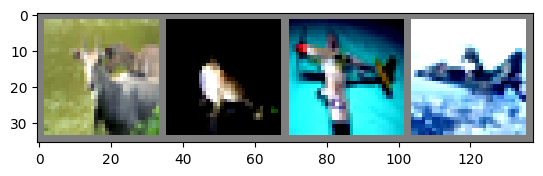

In [99]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))